In [1]:
from IPython.core.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [2]:
HTML("""
<style>
.preprocessing{
    background-color:#87ceeb;
    font-size: 20px;
    height: 50px;
    padding-top: 15px;
}
.model{
    background-color:#87ceeb;
    font-size: 20px;
    height: 50px;
    padding-top: 15px;
}
.main_head{
    font-family:courier;
}
.submission{
    background-color:#8CC739;
    font-size: 20px;
    height: 50px;
    padding-top: 15px;
}
</style>
""")

<h1 align="center" class="main_head">🎶 HEY! MINIONS, WHAT SONG IS POPULAR AMONG YOU GUYS? 🎶</h1>

<img src="https://thumbs.gfycat.com/NeedyDisgustingConey-size_restricted.gif" align="center">

Hello Everyone!

Welcome to the world of minions, it's Kevin(a popular minion) birthday & Stuart and Bob (Kevin's friend) have to decide a music playlist that they will use in Kevin's birthday party , let's do some help of Stuart & Bob and find out songs popular among minions😉

Hope we will rock in the Birthday Party🎉🎉

In this competition we are supposed to predict popularity of a song given features like acousticness, danceability, key, loudness, etc.

It is a classification problem , we have to predict whether song is popular or not?

Evaluation Metric - Area Under the ROC Curve(AUC)<br>
<a>https://en.wikipedia.org/wiki/Receiver_operating_characteristic</a>

### Let's have some insight about data🔍

<h2 align="center" class="preprocessing">1. Data Preprocessing🛠</h2>
<h3 align="center" class="preprocessing">1.1 Importing necessary libraries📚

In [3]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

<h3 align="center" class="preprocessing"> 1.2 Importing the data 📑</h3>

In [4]:
# Read the dataset
train = pd.read_csv("E:\\Competitions\\Kaggle\\Song Popularity Prediction\\Dataset\\train.csv")

train.head()

id  song_duration_ms  acousticness  danceability    energy  \
0   0          212990.0      0.642286      0.856520  0.707073   
1   1               NaN      0.054866      0.733289  0.835545   
2   2          193213.0           NaN      0.188387  0.783524   
3   3          249893.0      0.488660      0.585234  0.552685   
4   4          165969.0      0.493017           NaN  0.740982   

   instrumentalness   key  liveness  loudness  audio_mode  speechiness  \
0          0.002001  10.0       NaN -5.619088           0     0.082570   
1          0.000996   8.0  0.436428 -5.236965           1     0.127358   
2         -0.002694   5.0  0.170499 -4.951759           0     0.052282   
3          0.000608   0.0  0.094805 -7.893694           0     0.035618   
4          0.002033  10.0  0.094891 -2.684095           0     0.050746   

        tempo  time_signature  audio_valence  song_popularity  
0  158.386236               4       0.734642                0  
1  102.752988               3       0.711531                1  
2  178.685791               3       0.425536                0  
3  128.715630               3       0.453597                0  
4  121.928157               4       0.741311                0

In [5]:
test = pd.read_csv("E:\\Competitions\\Kaggle\\Song Popularity Prediction\\Dataset\\test.csv")

test.head()

id  song_duration_ms  acousticness  danceability    energy  \
0   0          308523.0      0.019845           NaN  0.908939   
1   1          200011.0      0.070119      0.731256  0.444655   
2   2          279758.0      0.810637      0.568858  0.125466   
3   3          249197.0           NaN      0.871789  0.557342   
4   4               NaN      0.765568      0.624687  0.710794   

   instrumentalness   key  liveness   loudness  audio_mode  speechiness  \
0          0.001438   NaN  0.112832  -8.890172           0     0.082714   
1          0.002020  10.0  0.139040  -6.301214           0     0.061685   
2          0.898841   0.0  0.226614 -11.542478           0     0.041868   
3          0.000715   4.0  0.325391  -7.905546           1     0.046815   
4          0.000346   8.0  0.308284        NaN           0     0.129284   

        tempo  time_signature  audio_valence  
0  126.129304               4       0.399620  
1   86.448149               3       0.499424  
2   99.544351               3       0.564951  
3  123.063854               4       0.906485  
4   88.703121               3       0.935571

In [6]:
print('Train Shape : {}'.format(train.shape))

print('Test Shape : {}'.format(test.shape))

Train Shape : (40000, 15)
Test Shape : (10000, 14)


In [7]:
train.dtypes

id                    int64
song_duration_ms    float64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
song_popularity       int64
dtype: object

In [8]:
train['song_popularity'].value_counts()

0    25424
1    14576
Name: song_popularity, dtype: int64

So our target column "song_popularity" contains two kind of values:

* 0 means song is not popular
* 1 means song is popular

In [9]:
train.describe()

id  song_duration_ms  acousticness  danceability  \
count  40000.00000      35899.000000  36008.000000  35974.000000   
mean   19999.50000     193165.847572      0.276404      0.570951   
std    11547.14972      45822.127679      0.297928      0.190010   
min        0.00000      25658.000000     -0.013551      0.043961   
25%     9999.75000     166254.500000      0.039618      0.424760   
50%    19999.50000     186660.000000      0.140532      0.608234   
75%    29999.25000     215116.000000      0.482499      0.718464   
max    39999.00000     491671.000000      1.065284      0.957131   

             energy  instrumentalness           key      liveness  \
count  36025.000000      36015.000000  35935.000000  35914.000000   
mean       0.683932          0.036527      5.042605      0.198514   
std        0.212662          0.150024      3.372728      0.151670   
min       -0.001682         -0.004398      0.000000      0.027843   
25%        0.539276          0.000941      2.000000      0.111796   
50%        0.704453          0.001974      5.000000      0.135945   
75%        0.870503          0.003225      8.000000      0.212842   
max        1.039741          1.075415     11.000000      1.065298   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  36043.000000  40000.000000  40000.000000  40000.000000    40000.000000   
mean      -7.407596      0.321150      0.094107    116.562815        3.394375   
std        3.877198      0.466924      0.083591     26.167911        0.524405   
min      -32.117911      0.000000      0.015065     62.055779        2.000000   
25%       -9.578139      0.000000      0.038500     96.995309        3.000000   
50%       -6.345413      0.000000      0.055881    113.795959        3.000000   
75%       -4.620711      1.000000      0.118842    128.517383        4.000000   
max       -0.877346      1.000000      0.560748    219.163578        5.000000   

       audio_valence  song_popularity  
count   40000.000000     40000.000000  
mean        0.580645         0.364400  
std         0.237351         0.481268  
min         0.013398         0.000000  
25%         0.398669         0.000000  
50%         0.598827         0.000000  
75%         0.759635         1.000000  
max         1.022558         1.000000

From 'count' property it seems like we have Null values in some features eg. song_duration_ms, acousticness , danceability etc.
We will figure out something for these Null values.

In [10]:
train['song_duration_ms']

0        212990.0
1             NaN
2        193213.0
3        249893.0
4        165969.0
           ...   
39995    237799.0
39996    191119.0
39997    160879.0
39998    193918.0
39999    196475.0
Name: song_duration_ms, Length: 40000, dtype: float64

<h3 align="center" class="preprocessing"> 1.3 Examine Missing Values 🧹</h3>

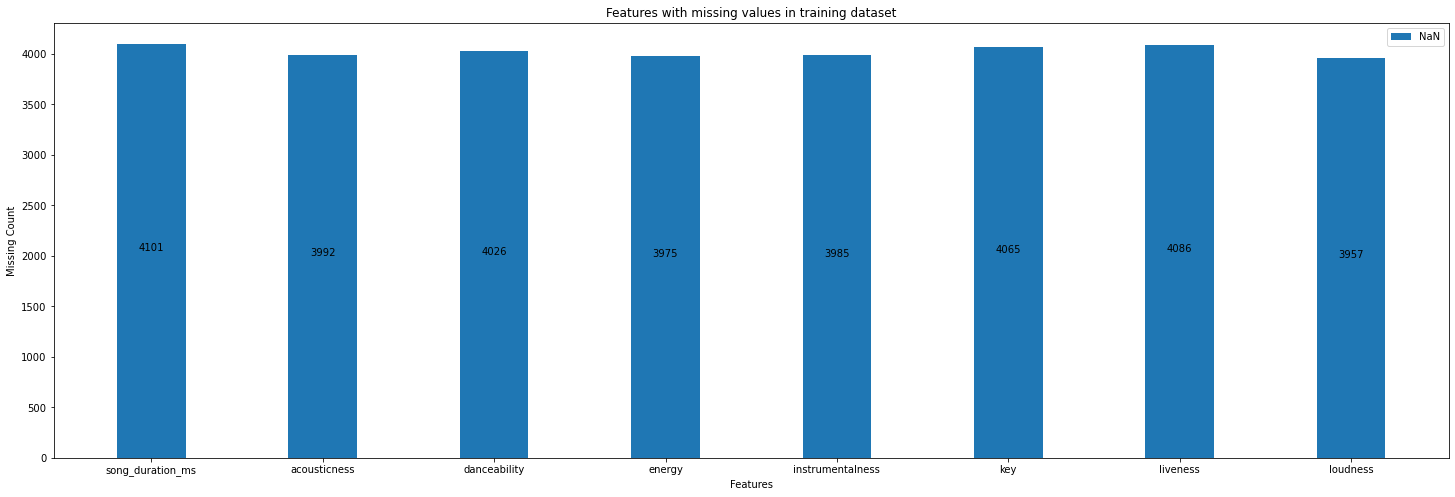

In [11]:
class Missing:
    
    def addlabels(self, x, y):
    
        for i in range(len(x)):
        
            plt.text(i, y[i]//2, y[i], ha = 'center')
    
    def missing_features(self, num_features_missing_train, num_features_missing_val):
    
        """
        Function to find features with missing values along with
        count of missing values for each feature
        """
        for feature in train.columns:
    
            if train[feature].isna().sum() != 0:
        
                num_features_missing_train.append(feature)
        
                num_features_missing_val.append(train[feature].isna().sum())
       
        fig = plt.figure(figsize=(25,8))
            
        plt.bar(num_features_missing_train, num_features_missing_val, width = 0.4)
    
        plt.title('Features with missing values in training dataset')
    
        plt.xlabel('Features')
    
        plt.ylabel('Missing Count')
    
        plt.legend(['NaN'], loc="upper right")
        
        self.addlabels(num_features_missing_train, num_features_missing_val)
        
missing = Missing()

num_features_missing_train = []

num_features_missing_val = []

missing.missing_features(num_features_missing_train, num_features_missing_val)

In [12]:
print("Feature {0} has {1} missing value in dataset which in maximum among all features.".format(
                                num_features_missing_train[num_features_missing_val.index(max(num_features_missing_val))],
                                max(num_features_missing_val)))

Feature song_duration_ms has 4101 missing value in dataset which in maximum among all features.


In [13]:
# Check for target missing values
train['song_popularity'].isna().sum()

0

In [14]:
class Song_Popularity:
    
    def __init__(self):
        
        self.fig = plt.figure(figsize=(15,8))
        
        self.color = ['#DB4C77', '#10559A']
        
        self.width = 0.3
        
    def addlabels(self, x, y):
    
        for i in range(len(x)):
        
            plt.text(i, y[i]//2, y[i], ha = 'center')
        
    def bar_graph(self, feature):
    
        train[feature].value_counts().plot(kind='bar', color = self.color, width = self.width)
        
        plt.title("Target : Song Popularity")
        
        plt.xlabel('song_popularity')
        
        plt.ylabel('Count')

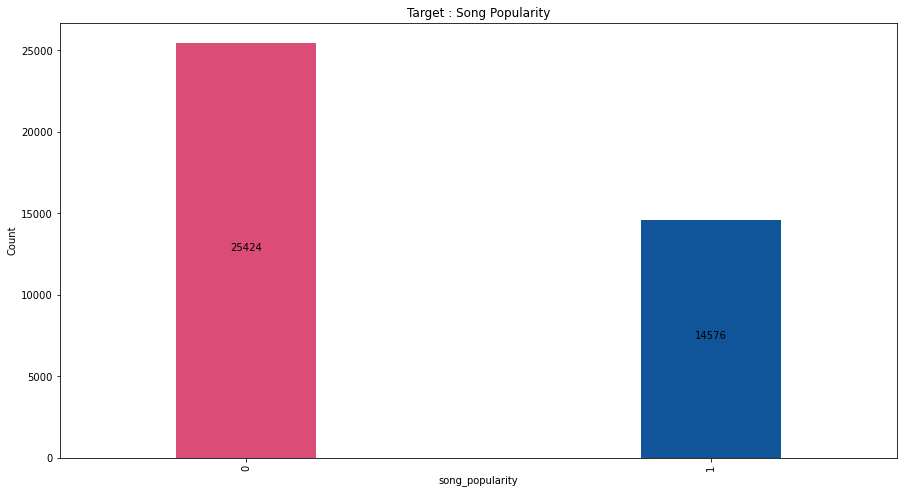

In [15]:
unique_val = train['song_popularity'].unique()

height = train['song_popularity'].value_counts()

song_pop = Song_Popularity()

song_pop.bar_graph('song_popularity')

song_pop.addlabels(unique_val, height)

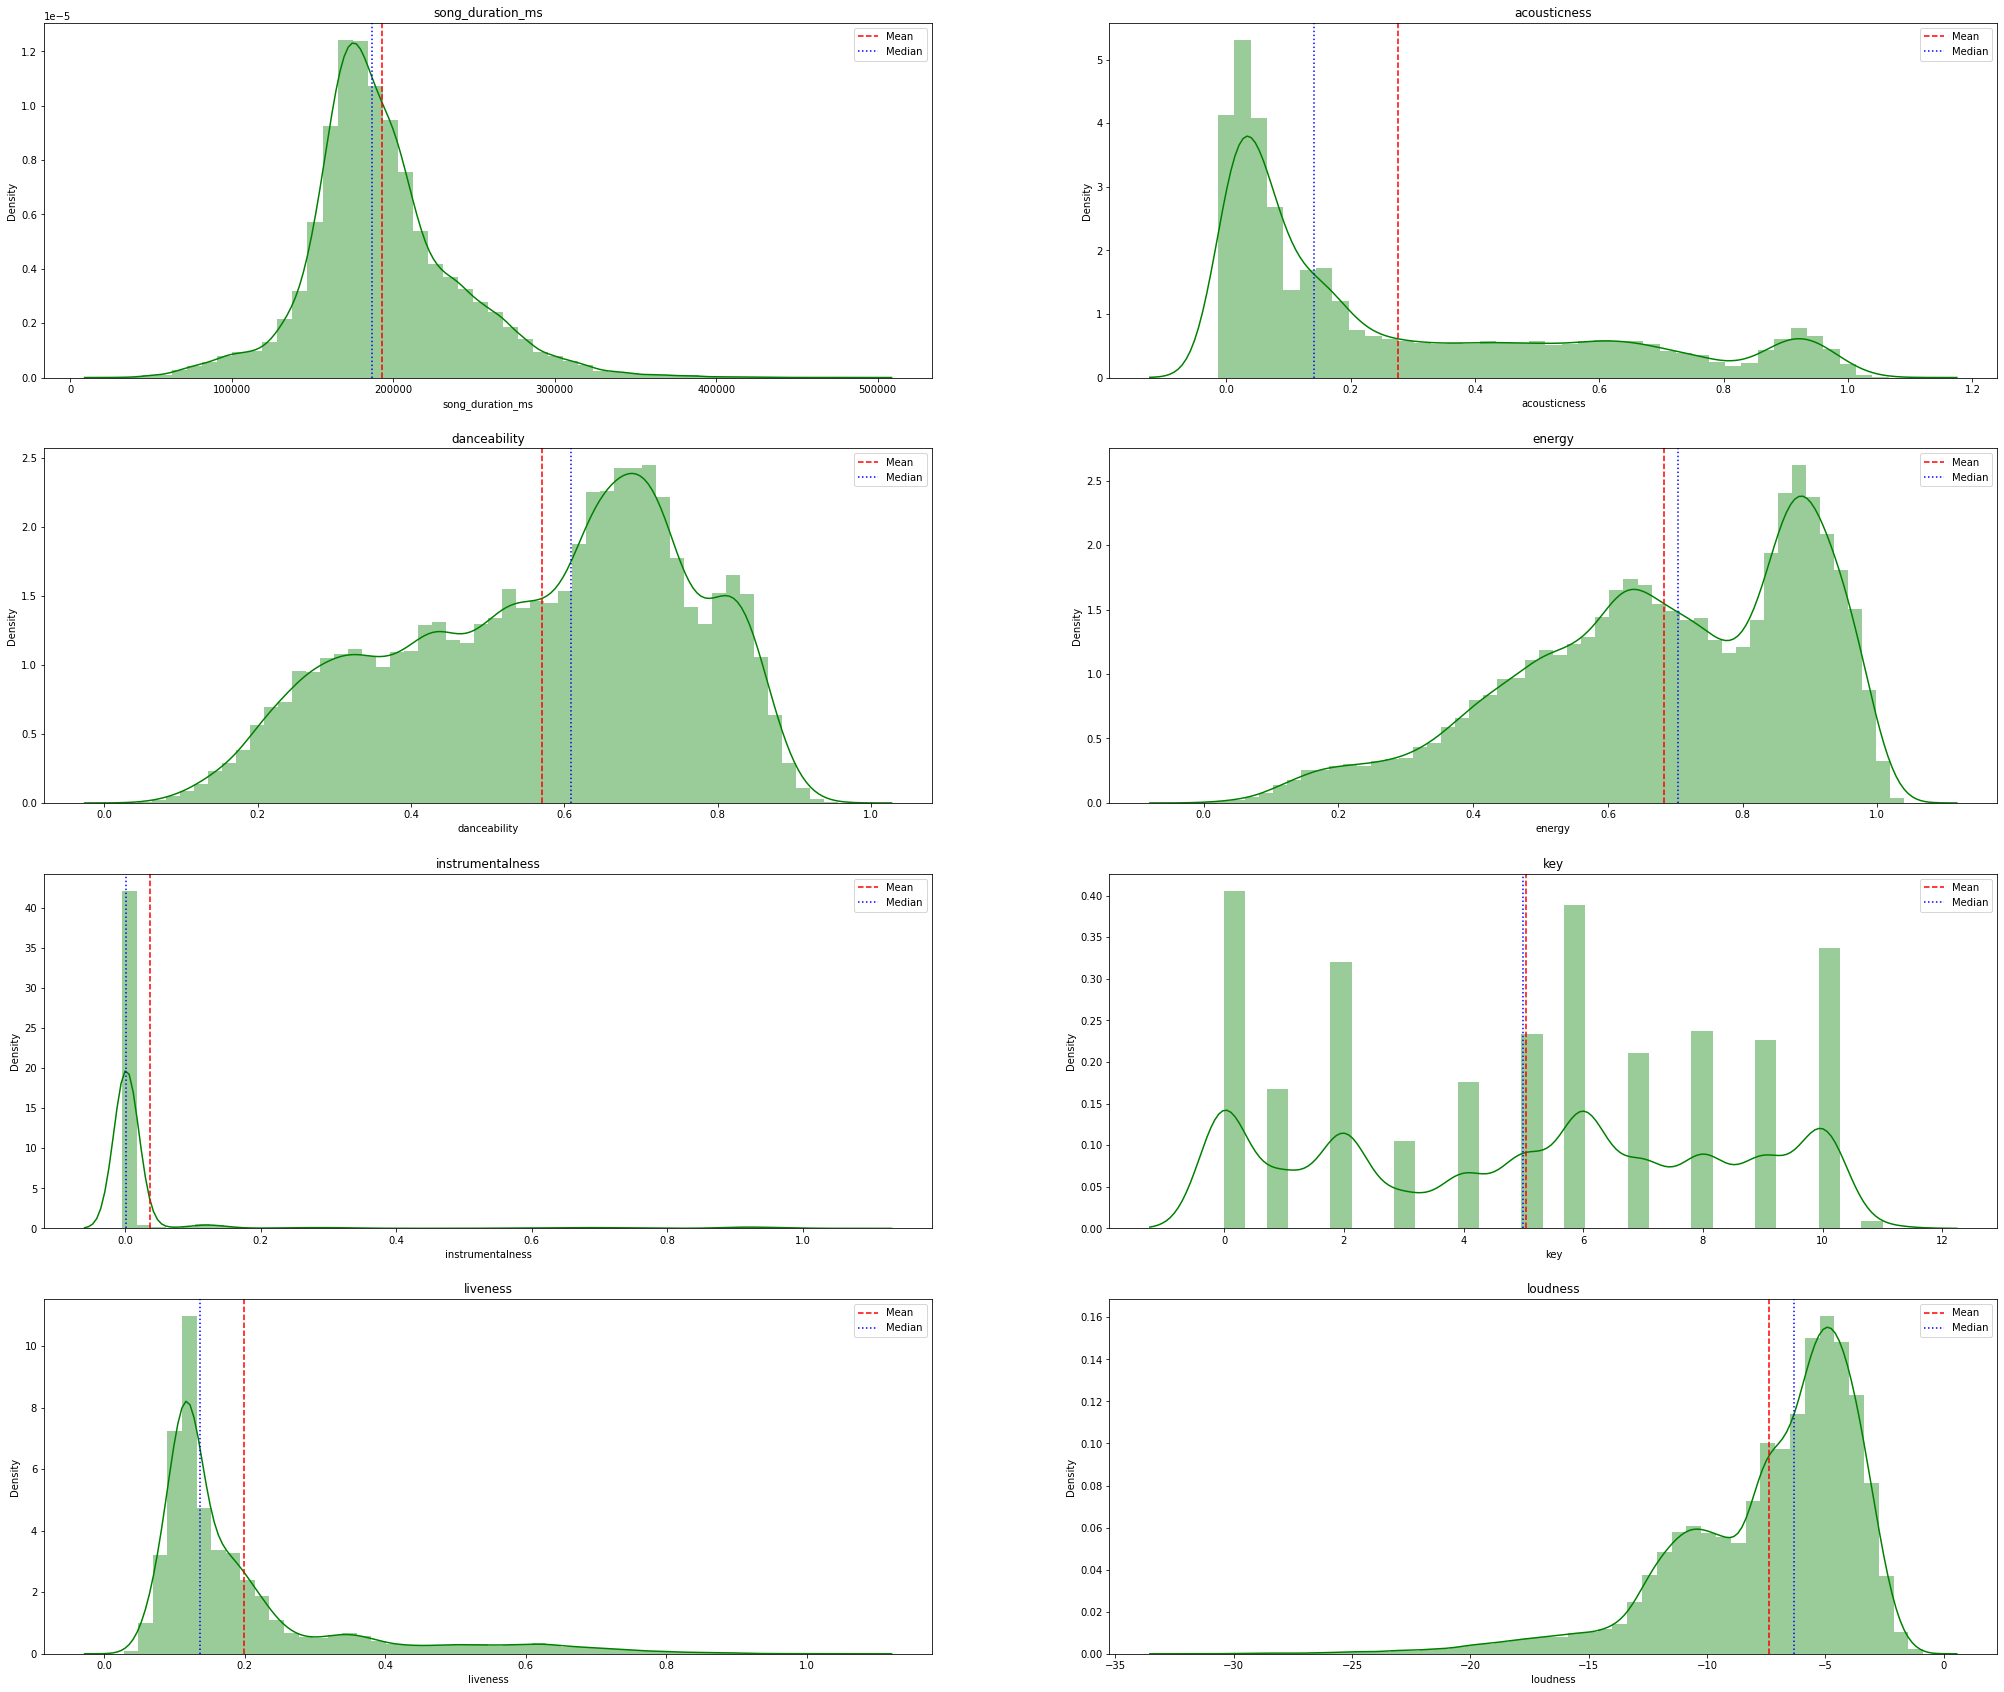

In [16]:
fig = plt.figure(figsize=(35,30))

fig.tight_layout()

for feature in enumerate(num_features_missing_train):
    
    plt.subplot(4, 2, feature[0] + 1)
    
    sns.distplot(train[feature[1]], color='green')
    
    plt.axvline(x = train[feature[1]].mean(), color = 'red', ls='--', label = "Mean")   
    
    plt.axvline(x = train[feature[1]].median(), color = 'blue', ls=':', label = "Median") 
    
    plt.title(feature[1])
    
    plt.legend(loc="upper right")


In [17]:
# Fill Missing values accoring to details gathered dist plot

class Fill_Missing:
    
    def fill_with_mean_val(self, fill_with_mean):
        
        """
        Fill missing values of features with normal distribution
        """
        for feature in fill_with_mean:
            
            print("Mean of feature {0} is : {1}".format(feature, train[feature].mean()))
  
            train[feature].fillna(train[feature].mean() , inplace=True)
            
            test[feature].fillna(test[feature].mean(), inplace=True)
    
    def fill_with_median_val(self, fill_with_median):
        
        """
        Fill missing values of features with skewness
        """

        for feature in fill_with_median:
            
            print("Median of feature {0} is : {1}".format(feature, train[feature].median()))
            
            train[feature].fillna(train[feature].median(), inplace=True)
            
            test[feature].fillna(test[feature].median(), inplace=True)
        
    
fill_miss = Fill_Missing()
    
fill_with_mean = ['song_duration_ms', 'danceability', 'key']

fill_with_median = ['acousticness','energy', 'instrumentalness', 'liveness', 'loudness']

fill_miss.fill_with_mean_val(fill_with_mean)

fill_miss.fill_with_median_val(fill_with_median)

Mean of feature song_duration_ms is : 193165.84757235576
Mean of feature danceability is : 0.5709511548062332
Mean of feature key is : 5.042604702935856
Median of feature acousticness is : 0.14053234888623756
Median of feature energy is : 0.7044533182633863
Median of feature instrumentalness is : 0.0019744766301669
Median of feature liveness is : 0.13594518271937028
Median of feature loudness is : -6.345412615480568


Using median value for features which are left or right skewed to replace missing values

In [18]:
for feature in train.columns:
    
    if train[feature].isna().sum() != 0:
        
        print(feature, train[feature].isna().sum())


No missing values now!

Data Correlation

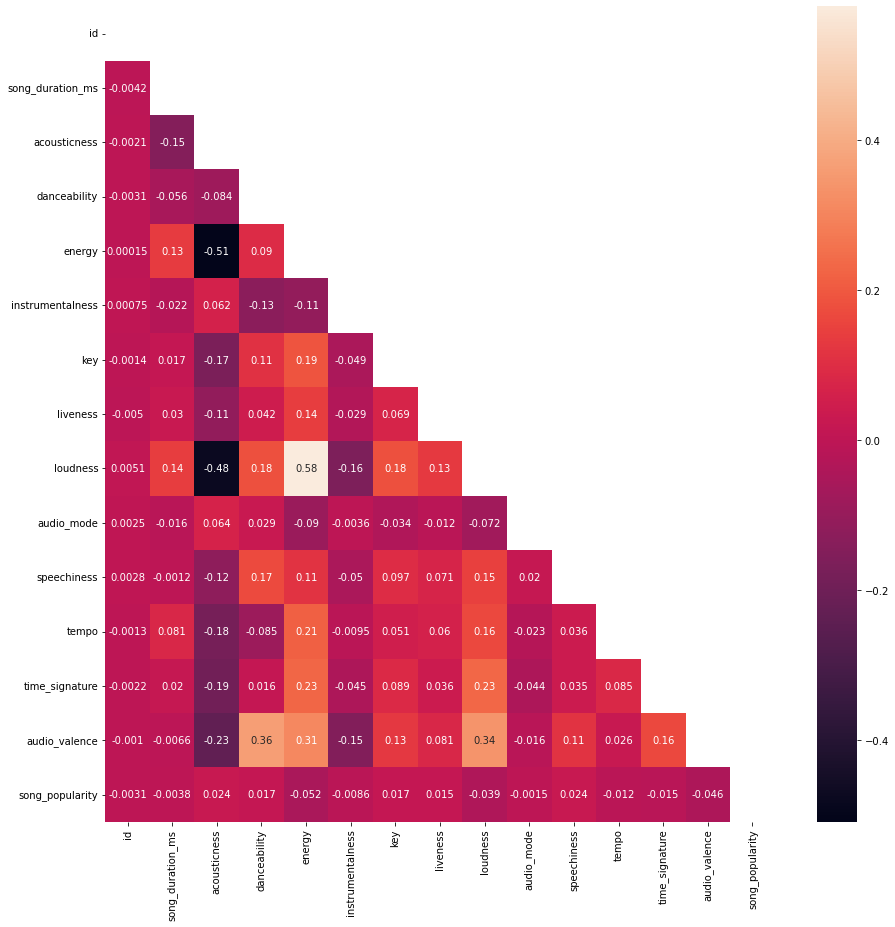

In [19]:
fig = plt.figure(figsize = (15, 15))

df = train

df = df[[col for col in df if df[col].nunique() > 1]]

corr_ = df.corr()

mask = np.zeros_like(corr_)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_, mask = mask, annot=True)

plt.show()

In [20]:
correlations = {}

for feature in train.columns:
    
    if feature != 'song_popularity':
    
        correlations[feature] =  train[feature].corr(train['song_popularity'])
    
print("Feature {0} has highest correlation with Song Popularity of {1}".format(
                                                        list(correlations.keys())[list(correlations.values()).index(max(correlations.values()))],
                                                        max(correlations.values()))
                                                        )

Feature acousticness has highest correlation with Song Popularity of 0.024451863283398295


Looking at the correlation table, we can note a few observations on what attributes make a song more popular.

* Energy and loudness seems highly proportional with each other.
* Acousticness is highest correlated feature with song_popularity in our dataset it seems our dataset contains songs which do not contain electric instruments(may be classic old songs) as they do not contains electric instruments or some remix influence in them.

<h3 align="center" class="model"> 2. Build A Predictive Model 🏗️</h3>

<h3 align="center" class="model"> 2.1  Importing necessary libraries 📚</h3>

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, roc_auc_score

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

In [22]:
# Train-Test Split

train_id = train['id']

X = train.drop(['song_popularity', 'id'], axis = 1)

Y = train['song_popularity']

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.30, random_state = 0)

<h3 align="center" class="model"> 2.2  PREDICTIVE MODEL 1(Extreme Gradient Boosting) </h3>

In [24]:
model_1 = XGBClassifier()

model_1.fit(X_train, Y_train, eval_metric='rmse')

model_1_pred = model_1.predict(X_val)

mean_abs_error_m1 = mean_absolute_error(model_1_pred, Y_val)

roc_m1 = roc_auc_score(model_1_pred, Y_val)

print("Mean Absolute Error of Model 1 : ", mean_abs_error_m1)

print("ROC of Model 1 : ", roc_m1)

Mean Absolute Error of Model 1 :  0.3873333333333333
ROC of Model 1 :  0.5254605743217334


So we have done something good but Stuart and Bob(Hope you remeber them:)) are not satisfied yet, seems we need to find more accurate ways to predict their playlist. Let's try one more method to build another model

<h3 align="center" class="model"> 2.3  PREDICTIVE MODEL 2(Extreme Gradient Boosting with Hyperparameter Optimization) </h3>

In [25]:
# Model Development 

# Hyperparameter Optimization (Taken some parameters from Version 2)

xgb_parms = {
                "max_depth"          :    [8],
                "min_child_weight"   :    [3],
                "learning_rate"      :    [0.05],
                "gamma"              :    [0.4],
                "colsample_bytree"   :    [0.6],
                'tree_method'        :    ["gpu_hist"],
                "objective"          :    ["binary:logistic"],
                "n_jobs"             :    [1, 2, 3, 4],
                "n_estimators"       :    list([i for i in range(5000, 40000, 5000)]),
                "predictor"          :    ["gpu_predictor"],
                "eval_metric"        :    ["auc"],           # Receiver Operating Characteristic Area under the Curve
            }

In [26]:
randomized_search = RandomizedSearchCV(model_1,  param_distributions = xgb_parms, scoring = 'roc_auc', cv = 5, verbose = 3)

In [27]:
start_time = time.time()

randomized_search.fit(X_train, Y_train)

end_time = time.time()

print("Time taken : {0}".format(end_time - start_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=2, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.544 total time=   9.8s
[CV 2/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=2, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.564 total time=   9.6s
[CV 3/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=2, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.552 total time=   9.7s
[CV 4/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=2, objective=binary:logistic, predictor=

[CV 4/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=1, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.553 total time=   9.2s
[CV 5/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=10000, n_jobs=1, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.572 total time=   9.1s
[CV 1/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=30000, n_jobs=3, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.544 total time=  21.9s
[CV 2/5] END colsample_bytree=0.6, eval_metric=auc, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=30000, n_jobs=3, objective=binary:logistic, predictor=gpu_predictor, tree_method=gpu_hist;, score=0.564 total time=

In [28]:
randomized_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='auc', gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=2, num_parallel_tree=1,
              predictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [29]:
randomized_search.best_params_

{'tree_method': 'gpu_hist',
 'predictor': 'gpu_predictor',
 'objective': 'binary:logistic',
 'n_jobs': 2,
 'n_estimators': 10000,
 'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'eval_metric': 'auc',
 'colsample_bytree': 0.6}

In [30]:
model_2 = XGBClassifier(**randomized_search.best_params_)

model_2.fit(X_train, Y_train, eval_metric='rmse')

model_2_pred = model_2.predict(X_val)

mean_abs_error_m2 = mean_absolute_error(model_2_pred, Y_val)

roc_m2 = roc_auc_score(model_2_pred, Y_val)

print("Mean Absolute Error of Model 2 : ", mean_abs_error_m2)

print("ROC of Model 2 : ", roc_m2)

Mean Absolute Error of Model 2 :  0.37116666666666664
ROC of Model 2 :  0.5470383499755811


<div class="alert alert-block alert-info">
📌So we got our next model and with some more accuracy. Let's try one more with Stratified k-fold cross-validation. It is same as just k-fold cross-validation, but in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

You can learn more from: https://www.geeksforgeeks.org/stratified-k-fold-cross-validation/
</div>

<h3 align="center" class="model"> 2.4  PREDICTIVE MODEL 3(XGB with Hyperparameter Optimization using Stratified K-fold Cross Validation) </h3>

In [31]:
# Using Stratified K-fold Cross Validation

from sklearn.model_selection import StratifiedKFold

In [32]:
targets = train['song_popularity'].values

columns = [col for col in train.columns if col not in ['id', 'song_popularity'] ]

In [33]:
n_splits_val = 10

auc_score = []

sk_fold = StratifiedKFold(n_splits = n_splits_val, shuffle=True, random_state=1)

model_3_pred = np.zeros((train.shape[0],))

for fold, (train_index, val_index) in enumerate(sk_fold.split(X = train, y=targets)):
    
    df_train, df_val = train.iloc[train_index][columns], train.iloc[val_index][columns]
    
    train_target, val_target = targets[train_index], targets[val_index]
    
    model_3 = XGBClassifier(**randomized_search.best_params_)
    
    model_3.fit(df_train[columns],
                train_target, 
                eval_metric='rmse', 
                eval_set=[(df_val[columns], val_target)],
                early_stopping_rounds=3000,
                verbose=500)

    model_3_val_pred = model_3.predict_proba(df_val[columns])[:,1]

    model_3_test_pred = model_3.predict_proba(test[columns])[:,1]
    
    model_3_pred[val_index] = model_3_val_pred
    
    model_3_test_pred += model_3_test_pred/n_splits_val
    
    auc = roc_auc_score(val_target, model_3_val_pred)
    
    auc_score.append(auc)
    
    print("FOLD IS {0} AUC IS {1} AND MEAN AUC IS {2}".format(fold, auc, np.mean(auc_score)))
    
    

[0]	validation_0-rmse:0.49801
[500]	validation_0-rmse:0.47882
[1000]	validation_0-rmse:0.47882
[1500]	validation_0-rmse:0.47882
[2000]	validation_0-rmse:0.47882
[2500]	validation_0-rmse:0.47882
[3000]	validation_0-rmse:0.47882
[3053]	validation_0-rmse:0.47882
FOLD IS 0 AUC IS 0.5725496747635926 AND MEAN AUC IS 0.5725496747635926
[0]	validation_0-rmse:0.49799
[500]	validation_0-rmse:0.48072
[1000]	validation_0-rmse:0.48072
[1500]	validation_0-rmse:0.48072
[2000]	validation_0-rmse:0.48072
[2500]	validation_0-rmse:0.48072
[3000]	validation_0-rmse:0.48072
[3044]	validation_0-rmse:0.48072
FOLD IS 1 AUC IS 0.5652878924502672 AND MEAN AUC IS 0.5689187836069299
[0]	validation_0-rmse:0.49808
[500]	validation_0-rmse:0.47947
[1000]	validation_0-rmse:0.47947
[1500]	validation_0-rmse:0.47947
[2000]	validation_0-rmse:0.47947
[2500]	validation_0-rmse:0.47947
[3000]	validation_0-rmse:0.47947
[3075]	validation_0-rmse:0.47947
FOLD IS 2 AUC IS 0.5704493555053491 AND MEAN AUC IS 0.5694289742397364
[0]	val

Hope our model predict correct "song_popularity" for test songs and further new songs for minions and hope Kevin, Stuart and Bob friendship will be more stronger

And finally we did it, ready for submission

<h3 align="center" class="submission"> 3. SUBMISSION 🎉✌️ </h3>

In [34]:
submission = pd.read_csv("E:\\Competitions\\Kaggle\\Song Popularity Prediction\\Dataset\\sample_submission.csv")

submission['song_popularity'] = model_3_test_pred

submission.to_csv('submission.csv', index = False)

Let me know if I can improve anywhere or if I had done something wrong , any feedback will be much appreciated !

Competition Final Rank - 186th of 535